### **Goal: To predict whether a shown cell image is the image of an infected cell or not**
#### Note : this type of problem is binary classification problem which would at last predict the probability of whether a cell is infected or not.Also here we would use CNNs to aid us in the problem


In [1]:
# there are many datasets availabale in tensorflow too which we can load using tensorflow_datasets
import tensorflow as tf # for models
import numpy as np # for mathematical computations
import matplotlib.pyplot as plt # for visualization
import tensorflow_datasets as tfds # for the malaria dataset
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, InputLayer, Flatten, BatchNormalization
from google.colab import drive
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import RootMeanSquaredError, Accuracy

In [ ]:
dataset, dataset_info = tfds.load('malaria',with_info = True)
# with_info is set True to gain dataset_info

In [ ]:
display(dataset,len(dataset)) # getting a dictionary which contains a key called 'train' which has values as the image tensors.
# also there are some associated thing called 'label'
# also we can't get the shape of the dataset at all or how many images are there in this dataset we can check dataset_info for it.

{Split('train'): <_PrefetchDataset element_spec={'image': TensorSpec(shape=(None, None, 3), dtype=tf.uint8, name=None), 'label': TensorSpec(shape=(), dtype=tf.int64, name=None)}>}

1

In [ ]:
# note: that dataset is a dictionary
# also, the 'train' key inside it has value as something called prefetch dataset with dictionaries with keys marked as 'image' and 'label'
# the 'image' key has 3d tensors as values (RGB format images) and the 'label' has two values called infected and uninfected.
# Infected is represented by 1 and uninfected by 0.
print(type(dataset),type(dataset['train'])) # Note the datatypes of both

<class 'dict'> <class 'tensorflow.python.data.ops.prefetch_op._PrefetchDataset'>


In [ ]:
# to show the 'data' is dict and to show the above written sentences,
for data in dataset['train'].take(3): # takes three set of image label dicts
  print(data)
# Note: the prefetched.datatype is iterable and we can access the 'data' dictionaries inside it only through iterations.
# Also, we can see that the 'data' has two key-value pairs where one key is labeled as 'image' and other as 'label'
# also note that different iamges have different dimensions.

{'image': <tf.Tensor: shape=(103, 103, 3), dtype=uint8, numpy=
array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)>, 'label': <tf.Tensor: shape=(), dtype=int64, numpy=1>}
{'image': <tf.Tensor: shape=(106, 121, 3), dtype=uint8, numpy=
array([[[0, 0, 0],

In [ ]:
# also,
dataset_info # there are 27,558 images of which 13,779 images are marked 1(uninfected) and others as 0(parasitized)

tfds.core.DatasetInfo(
    name='malaria',
    full_name='malaria/1.0.0',
    description="""
    The Malaria dataset contains a total of 27,558 cell images with equal instances
    of parasitized and uninfected cells from the thin blood smear slide images of
    segmented cells.
    """,
    homepage='https://lhncbc.nlm.nih.gov/publication/pub9932',
    data_dir='/root/tensorflow_datasets/malaria/1.0.0',
    file_format=tfrecord,
    download_size=337.08 MiB,
    dataset_size=317.62 MiB,
    features=FeaturesDict({
        'image': Image(shape=(None, None, 3), dtype=uint8),
        'label': ClassLabel(shape=(), dtype=int64, num_classes=2),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    nondeterministic_order=False,
    splits={
        'train': <SplitInfo num_examples=27558, num_shards=4>,
    },
    citation="""@article{rajaraman2018pre,
      title={Pre-trained convolutional neural networks as feature extractors toward
      improved malaria parasit

In [ ]:
# An important thing to realize.
for data in dataset['train']:
  print(len(dataset['train'])) # There are 27558 images in total for training and testing purposes
  print(data['image'])
  break
# NOTE: the shape (103,103,3) corresponds to 3 values in one [](A),then such (A) 103 values in another[](B),
# and again such (B) 103 values in another [].
# That is each vector with length 3 (example [R,G,B]) represents a single pixel which has depth of 3 colors red,green and blue.
# And that in an image here there are 103 X 103 such pixels arranged in 103 rows and 103 colunms
# you can understand the [[..]] as 1 row which contains 103 pixels and there are 103 such rows in this vector.

27558
tf.Tensor(
[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]], shape=(103, 103, 3), dtype=uint8)


In [ ]:
# we will again load the data but this time in different training,validation and testing set
(raw_train,raw_val,raw_test), metadeta = tfds.load(
    'malaria',
    with_info = True,
    as_supervised = True, # instead of dictionaries in the prefetched object theres are tuples beacuse of this statement
    shuffle_files = True, # shuffles the tuples
    split = ['train[:80%]','train[80%:90%]','train[90%:]'] # finally splitting it.
)

In [ ]:
print(len(raw_train),len(raw_val),len(raw_test)) # The images have been splitted into the train,val and test sets
# but we have a problem here. Just like earlier the datasets here are in the prefetched form containing TUPLES of image and it's label
# There are 22046 tuples in raw_train, 2756 in the raw_val and the remaining in raw_test.

22046 2756 2756


In [ ]:
for data in raw_train:
  print(data) # here each 'data' is a tuple, containing two tensors one for image and other for label.
  break

(<tf.Tensor: shape=(151, 115, 3), dtype=uint8, numpy=
array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)>, <tf.Tensor: shape=(), dtype=int64, numpy=1>)


In [ ]:
# for manual seperation,
TRAIN_RATIO = 0.8
VAL_RATIO = 0.1
TEST_RATIO = 0.1

dataset = tf.data.Dataset.range(10)
print(list(dataset.as_numpy_iterator()))

DATASET_SIZE = len(dataset)

train_dataset = dataset.take(int(TRAIN_RATIO*DATASET_SIZE)) # basically it takes the first specified elements in the dataset.
print(list(train_dataset.as_numpy_iterator()))

val_test_dataset = dataset.skip(int(TRAIN_RATIO*DATASET_SIZE)) # it skips the first specified elements in the dataset and takes others.
print(val_test_dataset) # similarly it has skipdataset type as it was called by skip
val_test_dataset = val_test_dataset.take(int(VAL_RATIO*DATASET_SIZE))
print(list(val_test_dataset.as_numpy_iterator()))
print(val_test_dataset) # just like earlier this has a new datatype called takedataset as it was called by take at last

test_dataset = dataset.skip(int(TRAIN_RATIO*DATASET_SIZE)+int(VAL_RATIO*DATASET_SIZE))
print(list(test_dataset.as_numpy_iterator()))

[np.int64(0), np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8), np.int64(9)]
[np.int64(0), np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7)]
<_SkipDataset element_spec=TensorSpec(shape=(), dtype=tf.int64, name=None)>
[np.int64(8)]
<_TakeDataset element_spec=TensorSpec(shape=(), dtype=tf.int64, name=None)>
[np.int64(9)]


####**DATA PREPARATION**

In [2]:
# to apply it on our original dataset we would reload it, and make a function called split
dataset, dataset_info = tfds.load(
    'malaria',
    with_info = True,
    as_supervised = True,
    shuffle_files = True,
    split = ['train']
)
dataset[0] # Note : we can apply take on 'Dataset' datatypes only.

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/1 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/malaria/incomplete.WZTCES_1.0.0/malaria-train.tfrecord*...:   0%|         …

Dataset malaria downloaded and prepared to /root/tensorflow_datasets/malaria/1.0.0. Subsequent calls will reuse this data.


<_PrefetchDataset element_spec=(TensorSpec(shape=(None, None, 3), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>

In [3]:
def splits(dataset, TRAIN_RATIO, VAL_RATIO, TEST_RATIO):
  DATASET_SIZE = len(dataset)

  train_dataset = dataset.take(int(TRAIN_RATIO*DATASET_SIZE))

  val_test_dataset = dataset.skip(int(TRAIN_RATIO*DATASET_SIZE))
  val_test_dataset = val_test_dataset.take(int(VAL_RATIO*DATASET_SIZE))

  test_dataset = dataset.skip(int(TRAIN_RATIO*DATASET_SIZE)+int(VAL_RATIO*DATASET_SIZE))

  return train_dataset,val_test_dataset,test_dataset

In [4]:
train_dataset, val_dataset, test_dataset = splits(dataset[0],0.8,0.1,0.1)
print(list(train_dataset.take(1).as_numpy_iterator()),list(val_dataset.take(1).as_numpy_iterator()),list(test_dataset.take(1).as_numpy_iterator()))

[(array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8), np.int64(1))] [(array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0,

#### **DATASET VISUALIZATION**

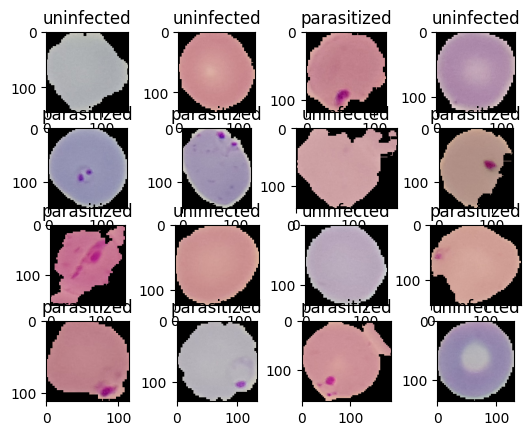

In [ ]:
for i, (image,label) in enumerate(train_dataset.take(16)):
  ax = plt.subplot(4,4,i+1)
  plt.imshow(image)
  plt.title(dataset_info.features['label'].int2str(label))

####**DATA PREPROCESSING**

In [ ]:
# Part (i) -->  converting the images to a standard size (244 X 244)
# Part (ii)-->  normalizing the images using normalization not standardization. Standardization(x-mu/delta),Normalization(x-xmin/xmax-xmin)

In [ ]:
# we standardize the data if the feautures revolve around a particular mean value or do follow some bell type curve.
# we normalize it when the data is varying very differently for example here, we have values ranging from 0 to 255 where at some pixels
# the values suddenly spike
# here the normalization can be simply done as X/255 as 255 is the max. value in a pixel and 0 is the min. value.

In [5]:
# Resizing the images and rescaling (Normalizing)
IM_SIZE = 224
def resize_rescale(image,label):
  return tf.image.resize(image, (IM_SIZE, IM_SIZE))/255.0, label

In [6]:
train_dataset = train_dataset.map(resize_rescale) # This is used for applying the mentioned function on every value of dataset like apply
# in pandas

In [7]:
val_dataset = val_dataset.map(resize_rescale)

In [8]:
test_dataset = test_dataset.map(resize_rescale)

In [9]:
for data in train_dataset:
  display(data)
  break
# as we can see that the shape of every image has been changed to (224,224,3)

(<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
 array([[[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],
 
        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],
 
        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],
 
        ...,
 
        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],
 
        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],
 
        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]]], 

In [10]:
train_dataset = train_dataset.shuffle(buffer_size = 8,reshuffle_each_iteration = True).batch(32).prefetch(tf.data.AUTOTUNE)
# this is used during training the model.
# After every epoch the dataset is shuffled in the buffer_size of 8 what do we mean by buffer_size of 8?
# The memory laods a batch of 8 elements (first 8) then chooses a random element and the 9th (n+1)th element is loaded into the deck.
# then that chosen element goes for batching.
# This is repeated for 32 elements for a single batch when it gets over another batch is created just like this
# what prefetch does is it laods the training data while former batch is training, so as to improve training time.
# AUTOTUNE is used because we don't know how many elements should be loaded it depends on the training itself sometimes it may take more time.
# so we leave the responsibility of loading to the model itself(autotune).

In [11]:
val_dataset = val_dataset.shuffle(buffer_size = 8,reshuffle_each_iteration = True).batch(32).prefetch(tf.data.AUTOTUNE)

In [12]:
test_dataset = test_dataset.shuffle(buffer_size = 8,reshuffle_each_iteration = True).batch(32).prefetch(tf.data.AUTOTUNE)

####**MODEL PREPARATION**

In [ ]:
# We would use CNNs here. In CNNs we only connect some neurons to a neuron. Whileas earlier in Dense models we connected every node to the
# previous layer's every node.
# suppose we have a 4 X 4 image and we want to convert this image in 2 X 2 to extract meaningful information from it? How exactly is this
# "information" meaningful? The truth lies in how the image was converted. It was converted by sliding the kernel over the image/
# How exactly this works is saved in CHATGPT history and is mentioned in various books too.
# For now just memorize a formula W(o) = ((W(i)-K+2P)/S)+1  here the K is kernel size(also called filter size)
# P is padding and s is the number of strides.
# Also padding can be automatically calculated by tensorflow.

In [15]:
# we would sequentially arrange the conv layers and here we are trying to replicate LeNet.
model = tf.keras.Sequential([
    InputLayer(shape = (IM_SIZE,IM_SIZE,3)),

    Conv2D(filters = 6,kernel_size = 3,strides = 1,padding = 'valid',activation = 'relu'),
    BatchNormalization(), # <-- V.V. Imp as without it the model wasn't imporving at all it is kind of a regularization which we would see.
    MaxPool2D(pool_size = 2,strides = 2),

    Conv2D(filters = 16,kernel_size = 3,strides = 1,padding = 'valid',activation = 'relu'),
    BatchNormalization(),
    MaxPool2D(pool_size = 2,strides = 2),

    Flatten(),

    Dense(100,activation = 'relu'),
    BatchNormalization(),
    Dense(10,activation = 'relu'),
    BatchNormalization(),
    Dense(1,activation = 'sigmoid')
])
model.summary() # This is just a demonstration of LeNet architecture not "state of art" type model.
# Also note that everywhere our outputs and inputs within the layers would be between 0 and 1.

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 222, 222, 6)    │           168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 222, 222, 6)    │            24 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 111, 111, 6)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 109, 109, 16)   │           880 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 109, 109, 16)   │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 54, 54, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 46656)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 100)            │     4,665,700 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 100)            │           400 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 10)             │         1,010 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 10)             │            40 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,668,297 (17.81 MB)

 Trainable params: 4,668,033 (17.81 MB)

 Non-trainable params: 264 (1.03 KB)

In [16]:
# For compiling (assigning the loss function and optimizer),
# we would use binary cross-entropy whose formula is -(ylogp + (1-y)log(1-p)) where y is the actual value and p is predicted value.
# To show that,
y_true = [0,]
y_pred = [0.01,]

y_true_1 = [0,]
y_pred_1 = [0.01,]
bce = BinaryCrossentropy(from_logits = False)
print(bce(y_true,y_pred)) # by setting from_logits = False we tell it that our output would be between [0,1]
bce_1 = BinaryCrossentropy(from_logits = True)
bce_1(y_true_1,y_pred_1)# also the default value of from_logits is False i.e, it already assumes
# that the input is between [0,1], we can see the difference by setting it to true.

tf.Tensor(0.010050327, shape=(), dtype=float32)


<tf.Tensor: shape=(), dtype=float32, numpy=0.6981596946716309>

In [17]:
# Let's compile then,
model.compile(
    optimizer = Adam(learning_rate = 0.001),
    loss = BinaryCrossentropy(),
    metrics = ['accuracy'] # added later to see how model evolves
)

In [ ]:
# finally fitting the data into it,
history = model.fit(train_dataset,validation_data = val_dataset,epochs = 20,verbose = 1)

Epoch 1/20
689/689 ━━━━━━━━━━━━━━━━━━━━ 46s 59ms/step - accuracy: 0.7085 - loss: 0.5596 - val_accuracy: 0.8505 - val_loss: 0.5716
Epoch 2/20
689/689 ━━━━━━━━━━━━━━━━━━━━ 39s 56ms/step - accuracy: 0.9288 - loss: 0.2038 - val_accuracy: 0.9372 - val_loss: 0.1813
Epoch 3/20
689/689 ━━━━━━━━━━━━━━━━━━━━ 37s 54ms/step - accuracy: 0.9381 - loss: 0.1875 - val_accuracy: 0.8984 - val_loss: 0.3660
Epoch 4/20
689/689 ━━━━━━━━━━━━━━━━━━━━ 49s 71ms/step - accuracy: 0.9422 - loss: 0.1747 - val_accuracy: 0.6022 - val_loss: 0.5439
Epoch 5/20
689/689 ━━━━━━━━━━━━━━━━━━━━ 55s 80ms/step - accuracy: 0.9462 - loss: 0.1594 - val_accuracy: 0.9448 - val_loss: 0.2100
Epoch 6/20
689/689 ━━━━━━━━━━━━━━━━━━━━ 64s 53ms/step - accuracy: 0.9536 - loss: 0.1412 - val_accuracy: 0.9205 - val_loss: 0.3452
Epoch 7/20
689/689 ━━━━━━━━━━━━━━━━━━━━ 38s 55ms/step - accuracy: 0.9542 - loss: 0.1384 - val_accuracy: 0.9481 - val_loss: 0.1771
Epoch 8/20
689/689 ━━━━━━━━━━━━━━━━━━━━ 40s 53ms/step - accuracy: 0.9587 - loss: 0.1274 - 

#### **MODEL EVALUATION**

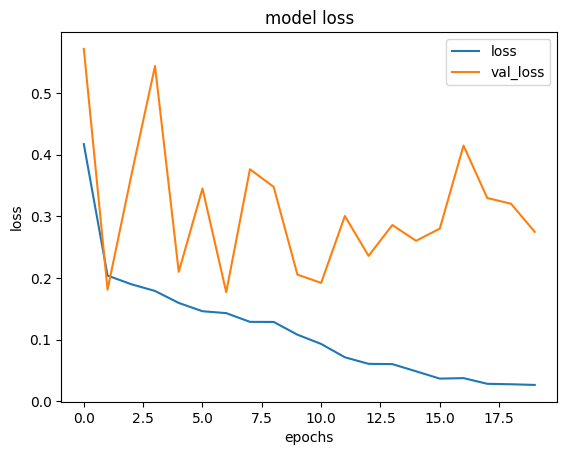

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['loss','val_loss'])
plt.show()

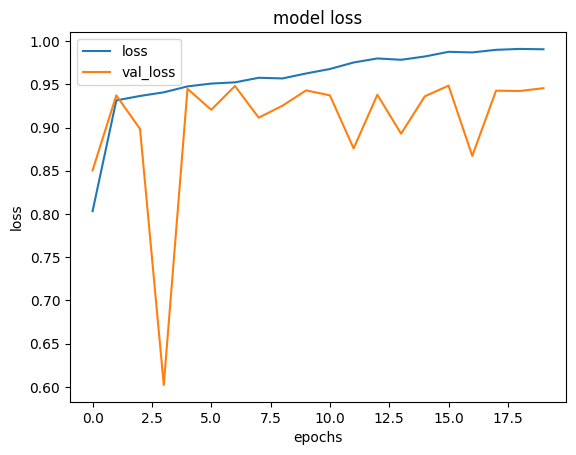

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('model loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['loss','val_loss'])
plt.show()

In [ ]:
model.evaluate(test_dataset)

87/87 ━━━━━━━━━━━━━━━━━━━━ 13s 33ms/step - accuracy: 0.9417 - loss: 0.2907


[0.313177227973938, 0.937976062297821]

In [ ]:
model.predict(test_dataset.take(1))[0][0]

1/1 ━━━━━━━━━━━━━━━━━━━━ 10s 10s/step


np.float32(1.4842493e-06)

In [ ]:
def parasite_or_not(x):
  if (x < 0.5):
    return str('P')
  else:
    return str('U')

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 615ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


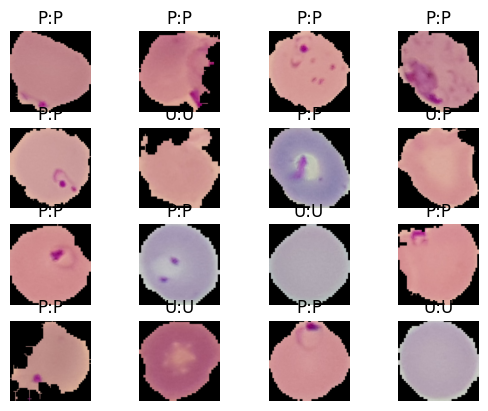

In [ ]:
for i, (image,label) in enumerate(test_dataset.take(16)):
  ax = plt.subplot(4,4,i+1)
  plt.imshow(image[0])
  plt.title(str(parasite_or_not(label.numpy()[0])) + ":" + str(parasite_or_not(model.predict(image)[0][0])))

  plt.axis('off') # only 1 wrong detection is there in the below graph

In [ ]:
# to save the model we just need to ,
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
model.save('/content/drive/MyDrive/Models_prepared.keras')